In [68]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

from plot_settings import *

# Path to the data
PATH = "../benchmarks/io_operations/data/"


data = pd.DataFrame(columns=["size","cores","method","time"])

for file in os.listdir(PATH):

    # Get the file name
    size = 80 # gb
    cores = file.split("_")[2].split("-")[1].split(".")[0]
    method = file.split("_")[1]

    print("Loading data from file: {}".format(file))
    np_data = np.loadtxt(PATH+file)
    if np_data.ndim == 0:
        np_data = np.array([np_data,])
    print(np_data.shape)
    pd_data = pd.DataFrame(np_data,columns=["time"])
    pd_data["size"] = size
    pd_data["cores"] = cores
    pd_data["method"] = method

    data = pd.concat([data,pd_data],ignore_index=True)

# Set index
data["cores"] = data["cores"].astype(int)
data = data.set_index(["size","cores","method"])

Loading data from file: times_cpp_parallel-96.txt
(6,)
Loading data from file: times_cpp_parallel-128.txt
(6,)
Loading data from file: times_cpp_parallel-32.txt
(3,)
Loading data from file: times_cpp_parallel-64.txt
(4,)
Loading data from file: times_dask_parallel-32.txt
(5,)
Loading data from file: times_dask_parallel-96.txt
(6,)
Loading data from file: times_dask_parallel-64.txt
(4,)
Loading data from file: times_dask_parallel-128.txt
(6,)


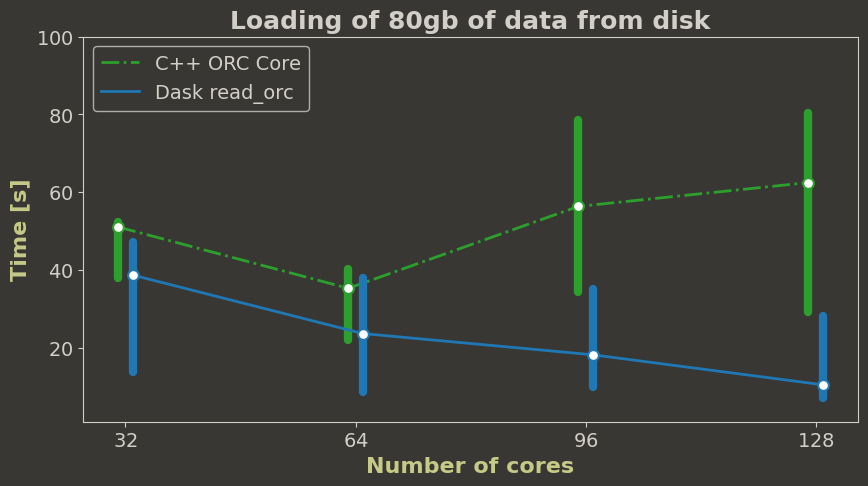

In [81]:

fig, ax = plt.subplots(1,1, figsize=(10,5))

cmap = plt.get_cmap("tab10")

# Set Some plot settings
labels = {"dask":"Dask read_orc", "numpy":"Numpy (threaded)", "cpp":"C++ ORC Core"}
styles = {"dask":"-", "numpy":"--", "cpp":"-."}
colors = {"dask":cmap(0), "numpy":cmap(1), "cpp":cmap(2)}
offset = {"dask":1, "numpy":0.1, "cpp":-1}

df_scaling = data.loc[80,:,:].groupby(["method","cores"]).quantile([0.05,0.5,0.95])

for method in df_scaling.index.get_level_values(0).unique():
    color = colors[method]
    label = labels[method]

    temp = df_scaling.loc[method,:,0.5]

    lower = df_scaling.loc[method,:,0.05]
    upper = df_scaling.loc[method,:,0.95]
    x = temp.index + offset[method]
    lines = ax.vlines(
        x= x,
        ymin=lower,
        ymax=upper,
        color=colors[method],
        ls="-",
        lw=6
    )
    lines.set_capstyle("round")

    ax.scatter(
        x,
        temp,
        marker="o",
        c="white",
        s=60,
        edgecolors=color,
        linewidth=1.5,
        zorder=10 
    )


    # Plot with error bars
    #ax.errorbar(x, ci50, yerr=[ci50-ci25, ci75-ci50], color=color, label=labels[method], zorder=10 , linewidth=2, ls=styles[method])
    ax.plot(
        x, 
        temp, 
        color=color, 
        label=label, 
        linewidth=2,
        ls=styles[method],
    ) 


ax.set_ylim(1, 100)
ax.set_xlabel("Number of cores")
ax.set_ylabel("Time [s]")


ax.legend(loc="upper left")


ax.set_xticks([32,64,96,128])

ax.set_title("Loading of 80gb of data from disk")


save_kwargs = {"bbox_inches":"tight", "dpi":300, "transparent":True}
fig.savefig("../figures/io_reading_times.png", **save_kwargs)

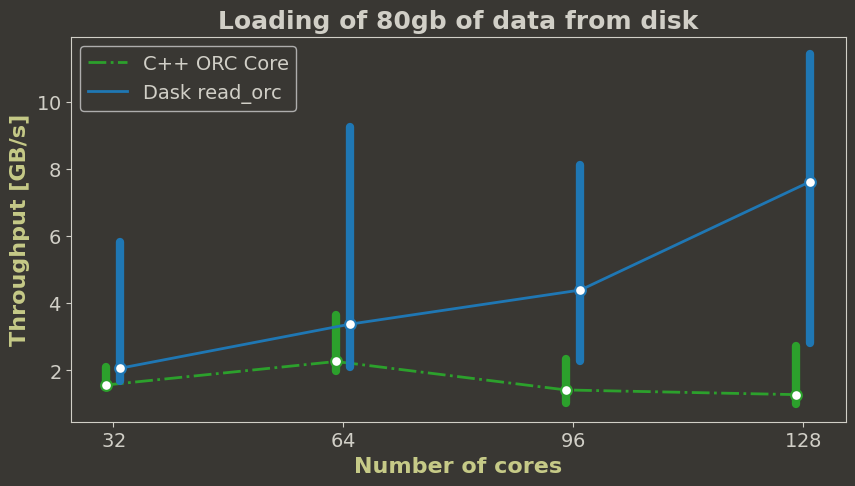

In [82]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
df_scaling = 80/data.loc[80,:,:].groupby(["method","cores"]).quantile([0.05,0.5,0.95])

for method in df_scaling.index.get_level_values(0).unique():
    color = colors[method]
    label = labels[method]

    temp = df_scaling.loc[method,:,0.5]

    lower = df_scaling.loc[method,:,0.05]
    upper = df_scaling.loc[method,:,0.95]
    x = temp.index + offset[method]
    lines = ax.vlines(
        x= x,
        ymin=lower,
        ymax=upper,
        color=colors[method],
        ls="-",
        lw=6
    )
    lines.set_capstyle("round")

    ax.scatter(
        x,
        temp,
        marker="o",
        c="white",
        s=60,
        edgecolors=color,
        linewidth=1.5,
        zorder=10 
    )


    # Plot with error bars
    #ax.errorbar(x, ci50, yerr=[ci50-ci25, ci75-ci50], color=color, label=labels[method], zorder=10 , linewidth=2, ls=styles[method])
    ax.plot(
        x, 
        temp, 
        color=color, 
        label=label, 
        linewidth=2,
        ls=styles[method],
    ) 


ax.set_xlabel("Number of cores")
ax.set_ylabel("Throughput [GB/s]")


ax.legend(loc="upper left")


ax.set_xticks([32,64,96,128])

ax.set_title("Loading of 80gb of data from disk")


save_kwargs = {"bbox_inches":"tight", "dpi":300, "transparent":True}
fig.savefig("../figures/io_throughput.png", **save_kwargs)